# Import & Exploration & Visualizing Data

## Data Definition

***Survived*** - If value is 1 equal survive if 0 equal not survive.

***Name*** - Name of a passenger.

***Pclass*** - Ticket class. A proxy for socio-economic status (SES).
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

***Sex*** - Gender.

***Age*** - Age in years.

- *Age is fractional i.e age **can be** fraction.*
- *If Age is in form of xx.5 that mean the age is estimated.*

***Sibsp*** - # of siblings / spouses aboard the Titanic.
- The dataset defines family relations in this way
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiances were ignored)

***Parch*** - # of parents / children aboard the Titanic.
- The dataset defines family relations in this way
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson  
    Some children travelled only with a nanny, therefore parch = 0 for them.

***Ticket*** - Ticket number.

***Fare*** - Passenger fare. (Fare is the money a passenger on public transportation has to pay)

***Cabin*** - Cabin number.

***Embarked*** - Port of Embarkation. (The geogpraphic point in a routing scheme from which cargo or personnel depart)
- C = Cherbourg
- Q = Queenstown
- S = Southampton


## Data Exploration

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [6]:
df.sample(n=5)

PassengerId  Survived  Pclass                              Name     Sex  \
404          405         0       3           Oreskovic, Miss. Marija  female   
751          752         1       3               Moor, Master. Meier    male   
875          876         1       3  Najib, Miss. Adele Kiamie "Jane"  female   
836          837         0       3                  Pasic, Mr. Jakob    male   
639          640         0       3        Thorneycroft, Mr. Percival    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
404  20.0      0      0  315096   8.6625   NaN        S  
751   6.0      0      1  392096  12.4750  E121        S  
875  15.0      0      0    2667   7.2250   NaN        C  
836  21.0      0      0  315097   8.6625   NaN        S  
639   NaN      1      0  376564  16.1000   NaN        S

Every PassengerId, Ticket, Name and Canbin are distint all distinct values (i.e can be identifier in that row). They won't be helpful data to use as features in a model. Look at Cabin column of the random samples 4 out of 5 samples have NaN value so I assume that there are a lot of empty values in the column.
- Survived, Pclass, Sex, Embarked are categorical data.
- Age, SibSp, Parch, Fare are numerical/quantitative data.

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

From the table above show that in this trainig dataset
- There are total of 891 passengers.
- 38% of the passenger survied in the crisis.
- Most of passenger are in 2nd-3rd Pclass.
- Mean age is 29.7 years old and the oldest is 80 years old, the youngest is 0.42.  
(fraction mean it's estimated so approximately 5 months old).
- Most SibSp and Parch passengers have is 8 and 6 respectively.
- 50 percentile of SibSp and Parch equal 0 implies that about 50% of passenger weren't came with family.  
(**This conclusion maybe wrong** because some family relation is not count as a SibSp or Parch according to the data definition)
- The most cost of fare is 512 dollars and the least is 0.  
(maybe 0 fare mean that passengers are crew?)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 177 null values in Age column or approximately 20% of the age data is missing. 
- 687 of Cabin number is missing. 77% out of 100% that's a massing amount of data missing  
but I think canbin number isn't a useful feature so I probably don't use it anyway.
- There are 2 null values in a Embarked column.

## Visualizing Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

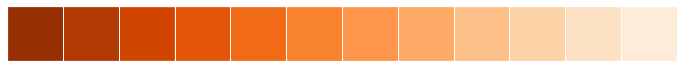

In [50]:
sb.set_style("darkgrid")
sb.set_context("notebook")
sb.set_palette("Oranges_r")
sb.palplot(sb.color_palette("Oranges_r", 12))

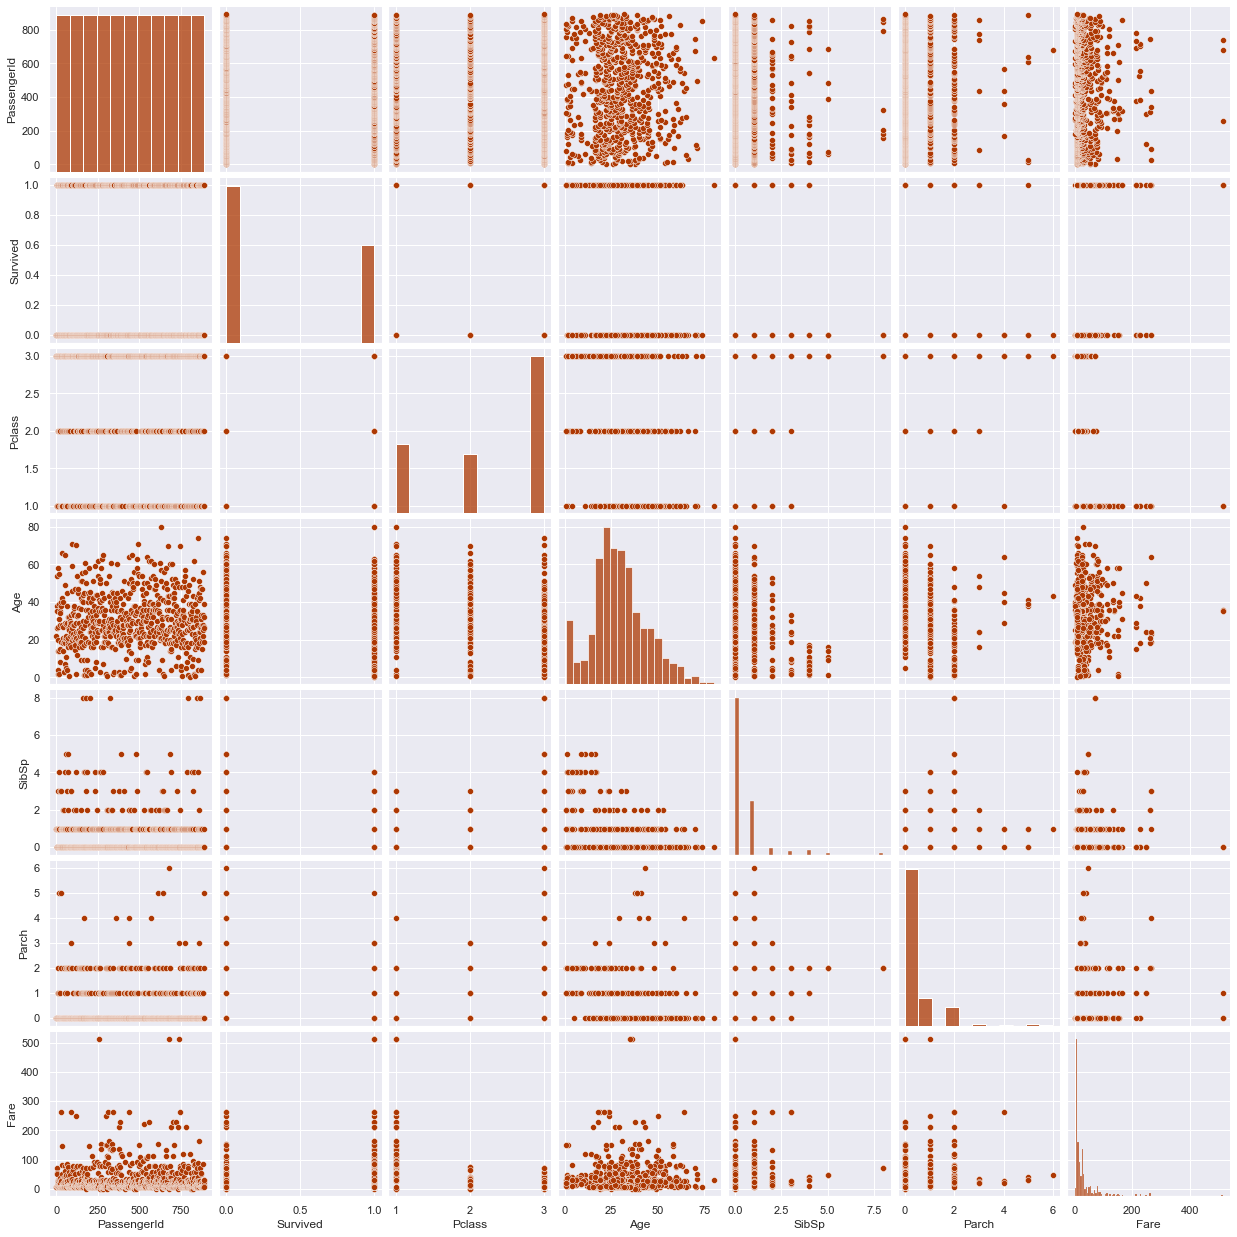

In [51]:
sb.pairplot(df)

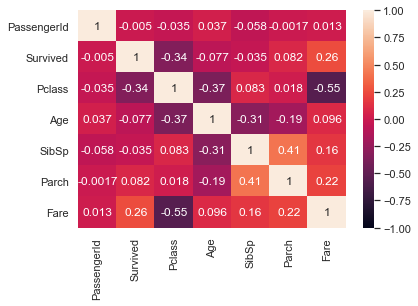

In [32]:
sb.heatmap(df.corr(), vmin=-1, annot=True);

You can from a heatmap above that 
- Correlation between Plcass and Fare is -0.55 mean that the more passenger fare have to pay the less Pclass which is true according to data definition that Pclass 1st is upper class.
- SibSp and Parch are correlate in positive way.

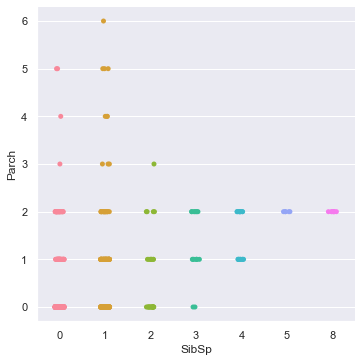

In [55]:
sb.catplot(x="SibSp", y="Parch", data=df);

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

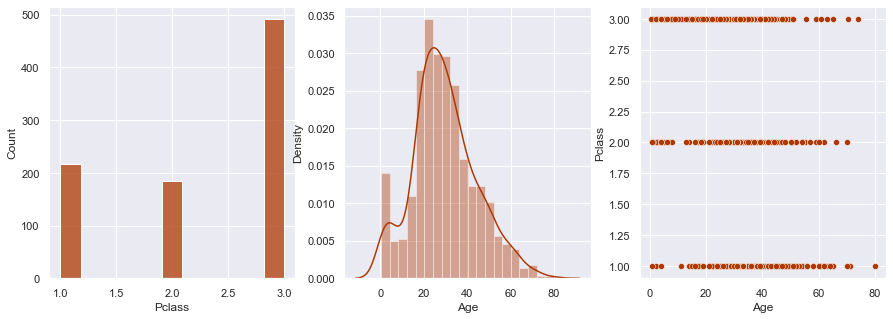

In [79]:
# tell matplotlib that we a gonna plot 3 plots
fig, axis = plt.subplots(ncols=3, figsize=(15,5))

sb.histplot(df["Pclass"], ax=axis[0])
sb.distplot(df["Age"], ax=axis[1])
sb.scatterplot(x="Age", y="Pclass", data=df, ax=axis[2])

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

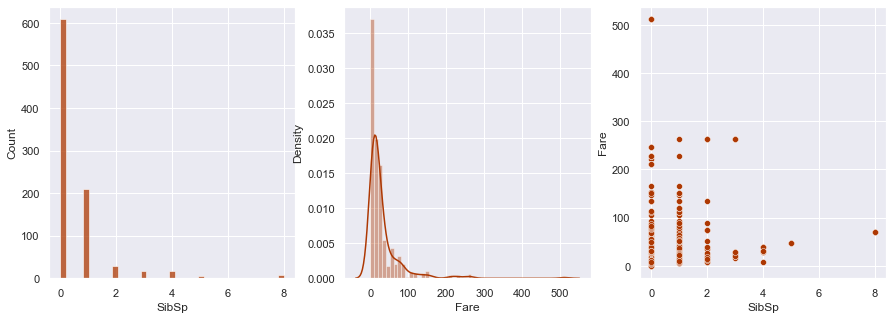

In [81]:
fig_sb, axis_sb = plt.subplots(ncols=3, figsize=(15,5))

sb.histplot(df["SibSp"], ax=axis_sb[0])
sb.distplot(df["Fare"], ax=axis_sb[1])
sb.scatterplot(x="SibSp", y="Fare", data=df)

# Data Cleaning & Preprocessing
Split label and features.

In [4]:
train = df.drop("Survived", axis=1).dropna(subset=["Embarked"], axis=0).copy()
train_label = df.dropna(subset=["Embarked"], axis=0)["Survived"].copy()

Encode categorical data.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
sex_encoder = OrdinalEncoder()
train_cat_sex = train[["Sex"]]
train_cat_sex_encoded = sex_encoder.fit_transform(train_cat_sex)
train_cat_sex_encoded[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [6]:
embarked_encoder = OrdinalEncoder()
train_cat_embarked = train[["Embarked"]]
train_cat_embarked_encoded = embarked_encoder.fit_transform(train_cat_embarked)
train_cat_embarked_encoded[:5]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.]])

Fill NaN of numerical data with mean.

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
train_num = train.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
train_num_transform = imputer.fit_transform(train_num)
train_num_transform[:5]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ]])

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
train_num_transform = num_pipline.fit_transform(train_num)
train_num_transform[:5]

array([[ 0.82520863, -0.56367407,  0.43135024, -0.47432585, -0.50023975],
       [-1.57221121,  0.66921696,  0.43135024, -0.47432585,  0.78894661],
       [ 0.82520863, -0.25545131, -0.47519908, -0.47432585, -0.48664993],
       [-1.57221121,  0.43804989,  0.43135024, -0.47432585,  0.42286111],
       [ 0.82520863,  0.43804989, -0.47519908, -0.47432585, -0.4841333 ]])

In [9]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipline, num_attribs),
    ("sex", sex_encoder, ["Sex"]),
    ("embarked", embarked_encoder, ["Embarked"])
])


train_prepared = full_pipeline.fit_transform(train)

In [10]:
train_prepared[:5]

array([[ 0.82520863, -0.56367407,  0.43135024, -0.47432585, -0.50023975,
         1.        ,  2.        ],
       [-1.57221121,  0.66921696,  0.43135024, -0.47432585,  0.78894661,
         0.        ,  0.        ],
       [ 0.82520863, -0.25545131, -0.47519908, -0.47432585, -0.48664993,
         0.        ,  2.        ],
       [-1.57221121,  0.43804989,  0.43135024, -0.47432585,  0.42286111,
         0.        ,  2.        ],
       [ 0.82520863,  0.43804989, -0.47519908, -0.47432585, -0.4841333 ,
         1.        ,  2.        ]])

# Selecting a Model
## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
X = full_pipeline.transform(train)
y = train_label
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [12]:
m = X[0, :]
log_reg.predict([m])

array([0], dtype=int64)

In [13]:
test_data = pd.read_csv("data/test.csv")
test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [14]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 0.82520863,  0.39952205, -0.47519908, ..., -0.48857868,
         1.        ,  1.        ],
       [ 0.82520863,  1.36271816,  0.43135024, ..., -0.50527302,
         0.        ,  2.        ],
       [-0.37350129,  2.51855349, -0.47519908, ..., -0.45116541,
         1.        ,  1.        ],
       ...,
       [ 0.82520863,  0.7077448 , -0.47519908, ..., -0.50023975,
         1.        ,  2.        ],
       [ 0.82520863, -0.10133993, -0.47519908, ..., -0.4841333 ,
         1.        ,  2.        ],
       [ 0.82520863, -0.10133993,  0.43135024, ..., -0.19606342,
         1.        ,  0.        ]])

In [16]:
predicted_test = log_reg.predict(test_data_prepared)
predicted_test_t = np.atleast_2d(predicted_test).T
predicted_test_t.shape

(418, 1)

In [17]:
identifier = test_data["PassengerId"].values
identifier_t = np.atleast_2d(identifier).T
identifier_t.shape

(418, 1)

In [221]:
predicted_matrix = np.concatenate((identifier_t, predicted_test_t), axis=1)
predicted_df = pd.DataFrame(predicted_matrix, columns=["PassengerId", "Survived"])
predicted_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [223]:
predicted_df.to_csv("predicted_titanic.csv", index=False)

accuraccy = 0.77/1

# Export the Model

In [194]:
import joblib
joblib.dump(log_reg, "log_titanic_model.pkl", compress=9)

['log_titanic_model.pkl']